In [1]:
import pandas as pd
import numpy as np
# from autoviz import AutoViz_Class
# from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cs-training.csv")


In [3]:
# report = ProfileReport(df)
# report.to_notebook_iframe()

In [4]:
# AV = AutoViz_Class()
# dft = AV.AutoViz(
#     filename='cs-training.csv',
#     sep=',',
#     depVar='SeriousDlqin2yrs',
#     dfte=None,
#     header=0,
#     verbose=2,
#     lowess=False,
#     chart_format='svg',
#     save_plot_dir=None
# )



In [5]:
df['MonthlyIncome'].isna().sum()

np.int64(29731)

In [6]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

/tmp/ipykernel_14423/4043395838.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)


In [7]:
df.isna().sum()

Unnamed: 0                                 0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
dtype: int64

- Around 6% of samples defaulted
- MonthlyIncome and NumberOfDependents have 29731 (19.82%) and 3924 (2.61%) null values respectively
- We also notice that when NumberOfTimes90DaysLate has values above 17, there are 267 instances where the three columns NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTime30-59DaysPastDueNotWorse share the same values, specifically 96 and 98.
- We can see that sharing the same values of 96 and 98 respectively is not logical since trivial calculations can reveal that being 30 days past due for 96 times for a single person within a timespan of 2 years is not possible.
- RevolvingUtilizationOfUnsecuredLines
- Defined as ratio of the total amount of money owed to total credit limit
- distribution of values is right-skewed, consider removing outliers
- It is expected that as this value increases, the proportion of people defaulting should increase as well
- However, we can see that as the minimum value of this column is set to 13, the proportion of defaulters is smaller than that belonging to the pool of clients with total amount of money owed not exceeding total credit limit.
- Thus we should remove those samples with RevolvingUtilizationOfUnsecuredLines's value more than equal to 13
- age
- There seems to be more younger people defaulting and the distribution seems fine on the whole
- NumberOfTimes90DaysLate
- It is interesting to note that there are no one who is 90 or more days past due between 17 and 96 times.
- NumberOfTime60-89DaysPastDueNotWorse
- It is interesting to note that there are no one who is 60-89 days past due between 11 and 96 times.
- NumberOfTime30-59DaysPastDueNotWorse
- It is interesting to note that there are no one who is 30-59 days past due between 13 and 96 times.
- DebtRatio
- 2.5% of clients owe around 3490 or more times what they own
- For the people who have monthly income in this 2.5%, only 185 people have values for their monthly incomes and the values are either 0 or 1.
- There are 164 out of these 185 people who are of two different types, first with no monthly income and does not default and second with monthly income and does default.
- MonthlyIncome
- Distribution of values is skewed, we can consider imputation with median.
- We can also consider imputing with normally distributed values with its mean and standard deviation.
- Numberof Dependents
- We can consider imputing with its mode, which is zero.

In [8]:
df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0], inplace=True)

/tmp/ipykernel_14423/2976688298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0], inplace=True)


In [9]:
df = df[df['DebtRatio'] < df['DebtRatio'].quantile(0.975)]

In [10]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

/tmp/ipykernel_14423/4043395838.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)


In [11]:
df = df[df['NumberOfTimes90DaysLate'] < 17]

In [12]:
df = df[(df['RevolvingUtilizationOfUnsecuredLines'] >= 0) &
        (df['RevolvingUtilizationOfUnsecuredLines'] < 13)]

In [13]:
df = df[df['age'] < 96]

In [14]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


#### Feature Engineering & Selection

In [16]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

In [18]:
def logistic(X,y):
    y_train=df['SeriousDlqin2yrs'].astype('uint8')
    X_train,X_test,y_train,y_test=train_test_split(df.drop('SeriousDlqin2yrs',axis=1),y_train,test_size=.2,random_state=2020)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)

    prob=lr.predict_proba(X_test)

    con_matrix = classification_report(y_test,lr.predict(X_test))
    
    roc=roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
    print('roc ',roc)
    print(con_matrix)

    return (prob[:,1],y_test)
y_train=df['SeriousDlqin2yrs'].astype('uint8')
probs,y_test=logistic(df.drop('SeriousDlqin2yrs',axis=1),y_train)

roc  0.8027901464230353
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27170
           1       0.61      0.17      0.27      1969

    accuracy                           0.94     29139
   macro avg       0.78      0.58      0.62     29139
weighted avg       0.92      0.94      0.92     29139



/home/puskchan/ML_projects/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

Normal split - f1 = 0.24


In [20]:
# y_train=df['SeriousDlqin2yrs'].astype('uint8')
# X_train,X_test,y_train,y_test=train_test_split(df.drop('SeriousDlqin2yrs',axis=1),y_train,test_size=.2,random_state=2020)

Stratified shuffle - f1 = 0.27

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('SeriousDlqin2yrs',axis=1)
y = df['SeriousDlqin2yrs'].astype('uint8')

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

Upsampling - f1 = 0.37

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

Downsampling + upsampling - f1 = 

In [23]:
from imblearn.combine import SMOTEENN

smenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smenn.fit_resample(X_train, y_train)

# Update the training data with resampled data
X_train = X_resampled
y_train = y_resampled 

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print(cm)
print('F1 score:', f1_score(y_test,y_pred))

Accuracy: 0.8577850990082021
[[23861  3354]
 [  790  1134]]
F1 score: 0.3537117903930131


In [26]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

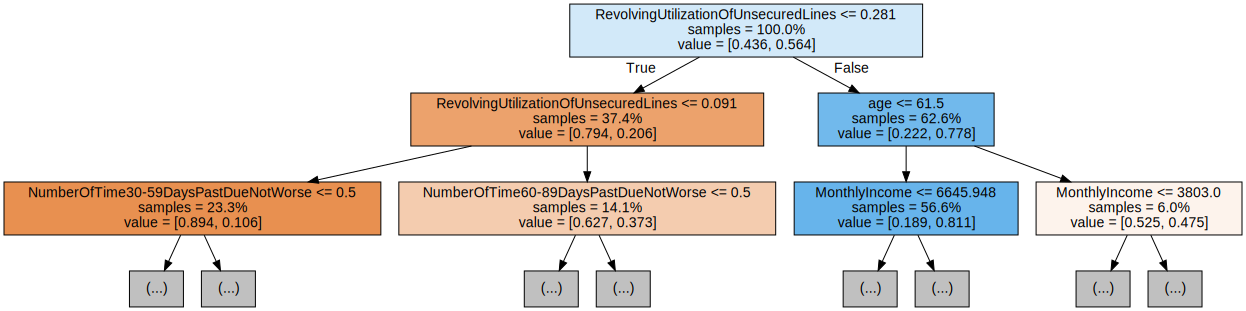

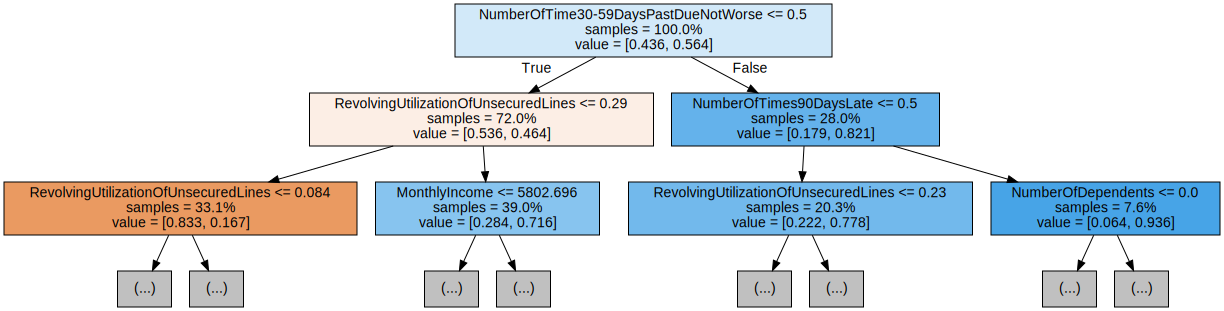

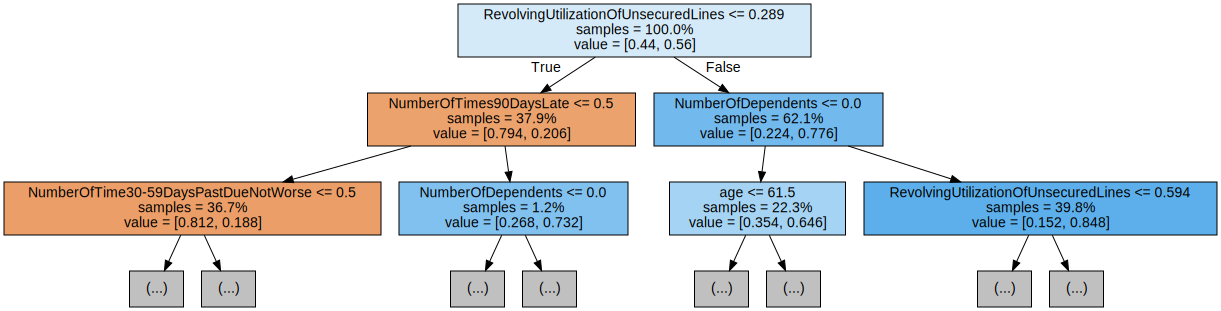

In [27]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [28]:
param_dist = {'n_estimators': randint(1,50),
              'max_depth': randint(1,10)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x75bf034afb80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x75bf034af4f0>})

In [29]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 9}


In [30]:
rf = RandomForestClassifier(max_depth=8, n_estimators=38)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print(cm)
print('F1 score:', f1_score(y_test,y_pred))

Accuracy: 0.729160231991489
[[19727  7488]
 [  404  1520]]
F1 score: 0.27808269301134286


In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

In [32]:
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"F1 Score: {f1}")
print(f"AUC-ROC Score: {roc}")

F1 Score: 0.3350227420402859
AUC-ROC Score: 0.8429109103874859


In [33]:
%matplotlib inline


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

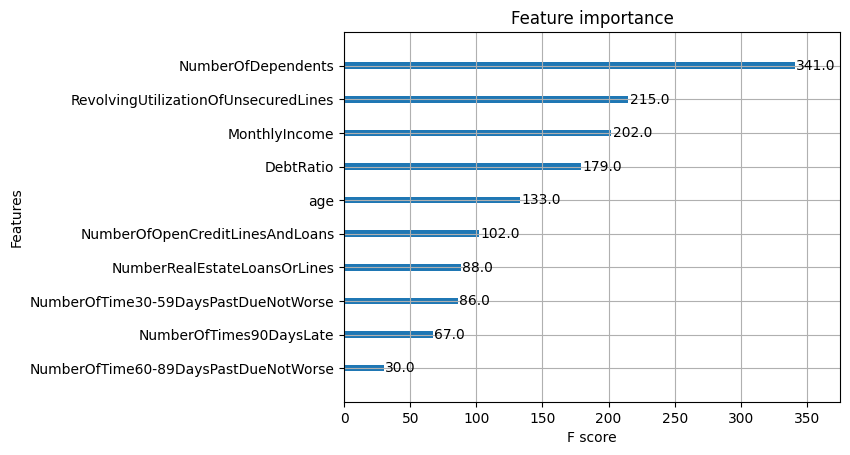

In [34]:
xgb.plot_importance(model)

In [35]:
# Calculating event rate
y_train.value_counts()


SeriousDlqin2yrs
1    90850
0    70172
Name: count, dtype: int64

In [36]:
scale_pos_weight = y_train.value_counts(normalize=True)[0] / y_train.value_counts(normalize=True)[1]
scale_pos_weight


np.float64(0.7723940561364887)

In [37]:
neg, pos = np.bincount(y_train)
scale = neg / pos
scale

np.float64(0.7723940561364887)

In [38]:
# import optuna
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# def objective(trial):
#     # Define hyperparameters to tune
#     params = {
#         'max_depth': trial.suggest_int('max_depth', 2, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1.0, log=True),
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'tree_method': 'gpu_hist',
#         'feval': f1_score
#         }
    
#     # Train the model with selected hyperparameters
#     model = XGBClassifier(**params)
#     model.fit(X_train, y_train)
    
#     # Evaluate the model on the test set
#     y_pred = model.predict(X_test)
#     accuracy = f1_score(y_test, y_pred)
    
#     return accuracy  # Optuna will maximize this score

# study = optuna.create_study(direction='maximize') # We want to maximize accuracy
# study.optimize(objective, n_trials=100) # Run optimization for 100 trials


In [39]:
# print(f"Best parameters: {study.best_params}")
# print(f"Best f1: {study.best_value:.4f}")

Best parameters: {'max_depth': 10, 'learning_rate': 0.028401044280341133, 'n_estimators': 267, 'subsample': 0.6218368116194033, 'colsample_bytree': 0.5495258271418902}
Best f1: 0.3545

In [40]:
from xgboost import XGBClassifier
final_model = XGBClassifier(max_depth= 10, learning_rate= 0.028401044280341133, n_estimators= 267, subsample= 0.6218368116194033, colsample_bytree= 0.5495258271418902, tree_method= 'gpu_hist', feval= f1_score)
final_model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.5495258271418902, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              feval=<function f1_score at 0x75bf09d02b00>, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.028401044280341133,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=267, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [41]:
accuracy = f1_score(y_test, final_model.predict(X_test))
print(f"Final model f1: {accuracy:.4f}")

Final model f1: 0.3495


In [42]:
y_probs = final_model.predict_proba(X_test)[:, 1]  # Prob of class 1

In [43]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

best_thresh = 0.5
best_f1 = 0

for t in np.arange(0.1, 0.9, 0.02):
    y_pred = (y_probs >= t).astype(int)
    score = f1_score(y_test, y_pred)
    if score > best_f1:
        best_f1 = score
        best_thresh = t
    print(f"Threshold: {t:.2f} | F1: {score:.4f}")


Threshold: 0.10 | F1: 0.2034
Threshold: 0.12 | F1: 0.2138
Threshold: 0.14 | F1: 0.2246
Threshold: 0.16 | F1: 0.2345
Threshold: 0.18 | F1: 0.2433
Threshold: 0.20 | F1: 0.2525
Threshold: 0.22 | F1: 0.2598
Threshold: 0.24 | F1: 0.2688
Threshold: 0.26 | F1: 0.2758
Threshold: 0.28 | F1: 0.2832
Threshold: 0.30 | F1: 0.2898
Threshold: 0.32 | F1: 0.2966
Threshold: 0.34 | F1: 0.3041
Threshold: 0.36 | F1: 0.3106
Threshold: 0.38 | F1: 0.3170
Threshold: 0.40 | F1: 0.3221
Threshold: 0.42 | F1: 0.3282
Threshold: 0.44 | F1: 0.3338
Threshold: 0.46 | F1: 0.3383
Threshold: 0.48 | F1: 0.3439
Threshold: 0.50 | F1: 0.3495
Threshold: 0.52 | F1: 0.3548
Threshold: 0.54 | F1: 0.3610
Threshold: 0.56 | F1: 0.3624
Threshold: 0.58 | F1: 0.3692
Threshold: 0.60 | F1: 0.3733
Threshold: 0.62 | F1: 0.3755
Threshold: 0.64 | F1: 0.3801
Threshold: 0.66 | F1: 0.3818
Threshold: 0.68 | F1: 0.3824
Threshold: 0.70 | F1: 0.3815
Threshold: 0.72 | F1: 0.3792
Threshold: 0.74 | F1: 0.3730
Threshold: 0.76 | F1: 0.3706
Threshold: 0.7

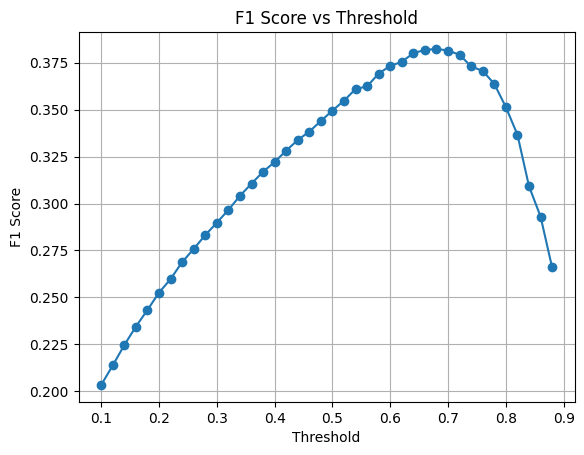

In [44]:
import matplotlib.pyplot as plt

thresholds = np.arange(0.1, 0.9, 0.02)
f1s = [f1_score(y_test, (y_probs >= t).astype(int)) for t in thresholds]
plt.plot(thresholds, f1s, marker='o')
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid()
plt.show()

In [45]:
import shap

explainer = shap.Explainer(final_model)   # for tree-based XGBoost
shap_values = explainer(X_test)          # Use your validation or test set here


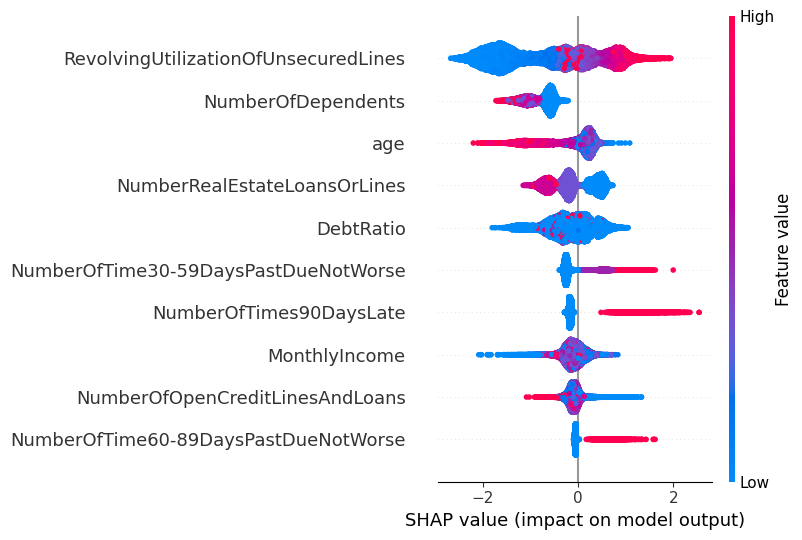

In [46]:
shap.summary_plot(shap_values, X_test)


In [54]:
shap.initjs()
shap.plots.force(shap_values[0])  # Explains prediction for the first instance


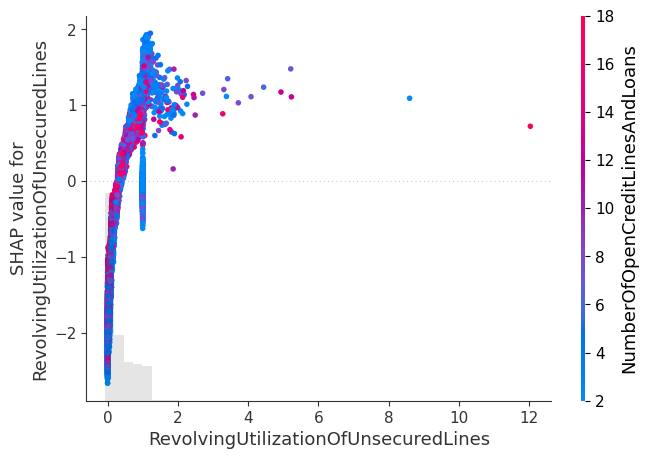

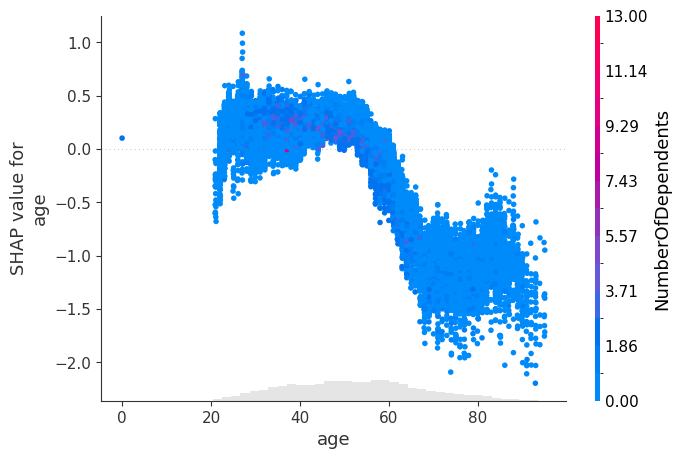

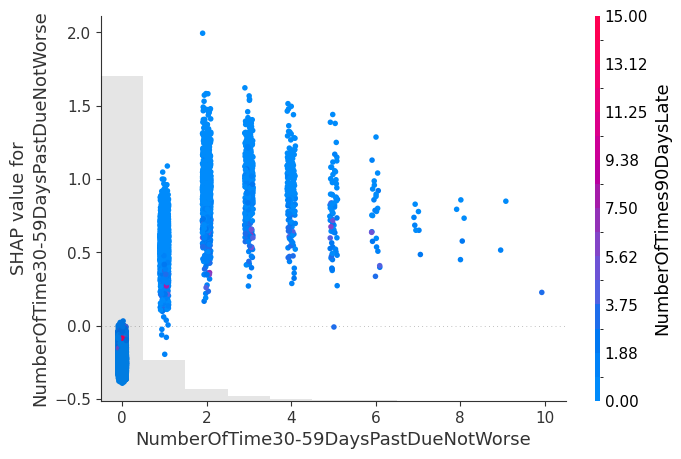

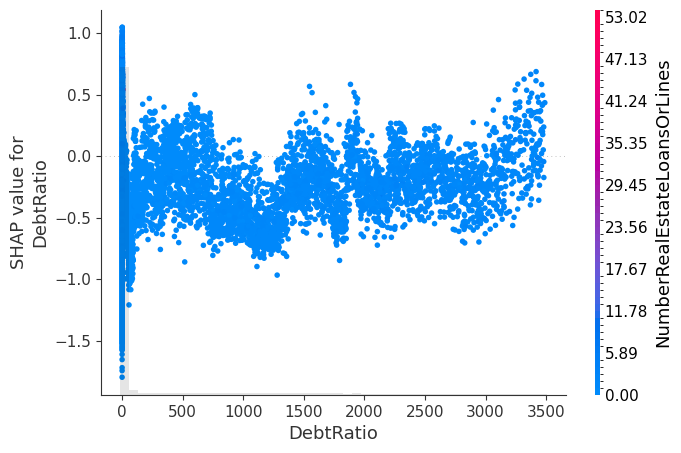

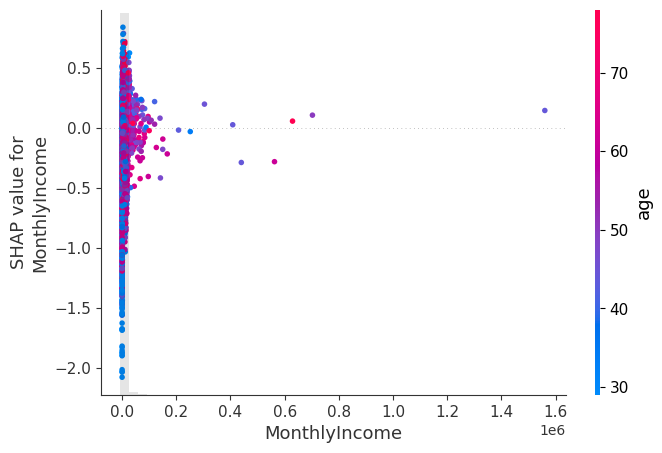

In [62]:
for i in range(5):
    shap.plots.scatter(shap_values[:,i], color=shap_values)


In [65]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Default', 'Default'],
    mode='classification'
)

i = 1  # Pick any instance index
exp = explainer.explain_instance(X_test.iloc[i], final_model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)


/home/puskchan/ML_projects/.venv/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/puskchan/ML_projects/.venv/lib/python3.10/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/puskchan/ML_projects/.venv/lib/python3.10/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 